# Introduction / Business Problem

If I were to develop an app that recommended local business to users, and I wanted to use the foursquare location data as my data source, what cities in the United States would be the best cities to launch this app in first. How would be know what cities would be best to start in? The answer to this question can be found by analyzing the foursquare location data. We would want to start in cities where there are high numbers of venues that exist in the foursquare database. In order for an app to give useful recommendations, it needs to have a large dataset to draw from. There would be no point in having an app if it has only a few recommendations to give. We would also want to start in cities with large populations so we can get a large user base.

# Data 

The data used for this project came from two sources. In order to choose the cities with large populations in the United States, the pandas package was used to read in a dataframe of the high population cities with their corresponding locations from the website https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population. The imported dataframe was then cleaned and sorted to only include the cities with the top 50 highest populations using the pandas library in python. Using the longitudes and latitudes of these cities, requests were sent to the foursquare API to search for the number of venues in their database within a radius of 100 km of the city location. The retreived information was put into the pandas database and was ranked in descending order based on the number of venues that were retrieved. This allows us to see the top 50 cities where we should start the recommendation app availability if we are going to be using the foursquare location data for our app. 

here is an example of the population dataframe
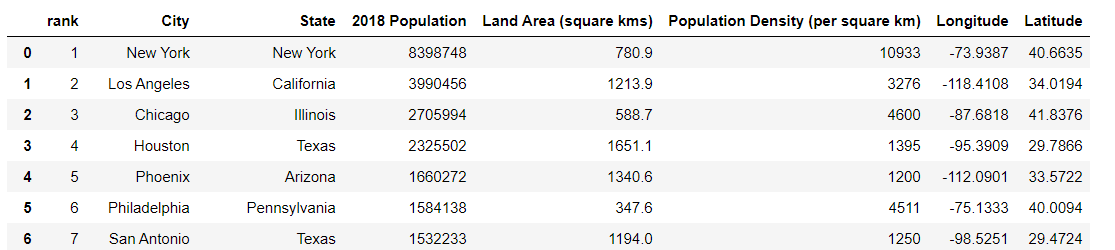

# Methodology

#### Import needed libraries and designate url for population data retrieval

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
from bs4 import BeautifulSoup
import requests
import lxml
import html5lib
url = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'
print('done')


done


#### Read in US city population dataframe into notebook and clean the data

In [2]:

df = pd.read_html(url)
df = df[4]
#drop unnecessary columns
df = df.drop(['2010Census', 'Change' ,'2016 land area', '2016 population density'], axis=1)
#rename columns and clean up 'City' title
df.rename(columns={'2018rank':'rank', 'State[c]':'State', '2018estimate':'2018 Population', '2016 land area.1': 'Land Area (square kms)', '2016 population density.1':'Population Density (per square km)'}, inplace=True)
df['City'] = df['City'].str.replace('\[\w?\]', '')




In [3]:
#Remove unneeded characters from "Location cell"
df['Location'] = df['Location'].str.replace('\S+\s\S+\s/\s', '')
df['Location'] = df['Location'].str.replace('N', '')
df['Location'] = df['Location'].str.replace('W', '')
df['Location'] = df['Location'].str.replace('\u00b0', '', regex=False)
df['Location']

# Split 'Location' column into two columns, one for longitude, one for latitude

new = df["Location"].str.split(" ", n = 1, expand = True) 
  
# making separate latitude columns 
df['Latitude'] = new[1]
# making separate longitude column
df["Longitude"]= new[0] 
  
# Dropping old location column 
df.drop(columns =["Location"], inplace = True) 



In [4]:
#Remove text from land area columns and change from string to float
df['Land Area (square kms)'] = df['Land Area (square kms)'].str.replace('\s+km2', '')
df['Land Area (square kms)'] = df['Land Area (square kms)'].str.replace(',', '')
df['Land Area (square kms)'] = df['Land Area (square kms)'].astype('float')

In [5]:
# Remove text from Population density column and change from string to integer
df['Population Density (per square km)'] = df['Population Density (per square km)'].str.replace('/km2', '')
df['Population Density (per square km)'] = df['Population Density (per square km)'].str.replace(',', '')
df['Population Density (per square km)'] = df['Population Density (per square km)'].astype('int')

In [6]:
#Remove text from Longitude column and change from string to float
df['Longitude'] = df['Longitude'].str.replace('\ufeff', '', regex=False)
df['Longitude'] = df['Longitude'].astype('float')
#Change Latitude column from string to float
df['Latitude'] = df['Latitude'].astype('float')
df['Latitude'] = -df['Latitude']
# I accidently labelled these columns wrong, so it was easier to just rename them rather than change a bunch of other code to switch them 
df.rename(columns={'Latitude':'Longitude', 'Longitude':'Latitude'}, inplace=True)


In [7]:
#correcting San Francisco Long and Lat to google values instead of table ones
# the first time I ran it with the table value and the values were innaccurate and gave a location of the city in the ocean
df.loc[14,'Longitude'] = -122.4194

df.loc[14,'Latitude'] = 37.7749

#Correcting values for New York City
df.loc[0,'Longitude'] = -74.0060

df.loc[0,'Latitude'] = 40.7128
#showing changed values of long and lat of San Francisco
df.head(20)

,rank,City,State,2018 Population,Land Area (square kms),Population Density (per square km),Longitude,Latitude
0,1,New York,New York,8398748,780.9,10933,-74.0060,40.7128
1,2,Los Angeles,California,3990456,1213.9,3276,-118.4108,34.0194
2,3,Chicago,Illinois,2705994,588.7,4600,-87.6818,41.8376
3,4,Houston,Texas,2325502,1651.1,1395,-95.3909,29.7866
4,5,Phoenix,Arizona,1660272,1340.6,1200,-112.0901,33.5722
5,6,Philadelphia,Pennsylvania,1584138,347.6,4511,-75.1333,40.0094
6,7,San Antonio,Texas,1532233,1194.0,1250,-98.5251,29.4724
7,8,San Diego,California,1425976,842.3,1670,-117.1350,32.8153
8,9,Dallas,Texas,1345047,882.9,1493,-96.7665,32.7933
9,10,San Jose,California,1030119,459.7,2231,-121.8189,37.2967


In [8]:
#Create a dataframe of top 10 cities for testing code
df10 = df[0:10][:]
# Create a dataframe of top 50 cities ranked by population
df50 = df[0:50][:]
#Display the dataframe
df50

,rank,City,State,2018 Population,Land Area (square kms),Population Density (per square km),Longitude,Latitude
0,1,New York,New York,8398748,780.9,10933,-74.0060,40.7128
1,2,Los Angeles,California,3990456,1213.9,3276,-118.4108,34.0194
2,3,Chicago,Illinois,2705994,588.7,4600,-87.6818,41.8376
3,4,Houston,Texas,2325502,1651.1,1395,-95.3909,29.7866
4,5,Phoenix,Arizona,1660272,1340.6,1200,-112.0901,33.5722
5,6,Philadelphia,Pennsylvania,1584138,347.6,4511,-75.1333,40.0094
6,7,San Antonio,Texas,1532233,1194.0,1250,-98.5251,29.4724
7,8,San Diego,California,1425976,842.3,1670,-117.1350,32.8153
8,9,Dallas,Texas,1345047,882.9,1493,-96.7665,32.7933
9,10,San Jose,California,1030119,459.7,2231,-121.8189,37.2967


# Now to find out which cities use foursquare the most
#### Import needed libraries

In [9]:
import json #library to handle JSON files

#### Define foursquare credentials

In [10]:
CLIENT_ID = 'FH4KJIMSS5UDBL4IHGSVNFAUSBC34OMAEFRQLKGMP2BLWTJ1' # your Foursquare ID
CLIENT_SECRET = '2DU4PMEZGZ41GBQNTMO3FSLPVL5NCREOGNCX1UTEZPSCIK2Q' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FH4KJIMSS5UDBL4IHGSVNFAUSBC34OMAEFRQLKGMP2BLWTJ1
CLIENT_SECRET:2DU4PMEZGZ41GBQNTMO3FSLPVL5NCREOGNCX1UTEZPSCIK2Q


#### Test the code for retrieving the data on a single city

In [11]:
#GET https://api.foursquare.com/v2/venues/search
lat = df10.loc[0]['Latitude'] 
lng = df10.loc[0]['Longitude']
LIMIT = 500
radius = 100000
print(lat,lng)
#lat = 40.6635
#lng = -73.9387

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{},&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            radius,
            LIMIT)
results = requests.get(url).json()
#results = requests.get(url).json()

#results

40.7128 -74.006


#### Define a function for retrieving the venues from cities and creating a dataframe showing the number of venues in each city

In [12]:
def getVenues(city, state, latitudes, longitudes):
    
        venues_list=[]
        for city, state, lat, lng in zip(city, state, latitudes, longitudes):
            
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng,
                radius,
                LIMIT)
            
            
            results = len(requests.get(url).json()['response']['venues'])
            
            
            venues_list.append([city, state, results])
        
            
        Venues = pd.DataFrame(venues_list)
        Venues.columns = ['City', 'State', 'Number of Venues on Foursquare']  
        
        return(Venues)
            
        

#### Run the function on our top 50 most populated cities with a radius of 100 km

In [13]:
LIMIT = 500
radius = 100000
city_venues = getVenues(city=df50['City'], state=df50['State'], latitudes=df50['Latitude'],
                           longitudes=df50['Longitude'])

#### View the resulting dataframe and sort it by number of venues in foursquare database

In [14]:
#display dataframe
city_venues

,City,State,Number of Venues on Foursquare
0,New York,New York,117
1,Los Angeles,California,104
2,Chicago,Illinois,96
3,Houston,Texas,74
4,Phoenix,Arizona,93
5,Philadelphia,Pennsylvania,101
6,San Antonio,Texas,79
7,San Diego,California,120
8,Dallas,Texas,110
9,San Jose,California,72


In [15]:
#sort dataframe by number of venues
city_venues.sort_values(by=['Number of Venues on Foursquare'], ascending=False, inplace=True)
city_venues.reset_index(drop=True, inplace=True)


# Results

In [16]:
city_venues

,City,State,Number of Venues on Foursquare
0,Baltimore,Maryland,122
1,Nashville,Tennessee,122
2,Seattle,Washington,122
3,Long Beach,California,121
4,Jacksonville,Florida,120
5,Kansas City,Missouri,120
6,Albuquerque,New Mexico,120
7,San Diego,California,120
8,Portland,Oregon,119
9,Arlington,Texas,118


#### The table above shows the top 50 cities you should start in when making an app using foursquare data to locate venues as they have the most venue points within 100 km radius.

These cities have the most venues returned when a search query is done using the location data from the website we chose for city and population data. These are also the cities with the top 50 populations in the United states. 

# Discussion

When I ran the data analysis the first time, I was surprised by the results. For instance, San Francisco only returned 4 results. I would have guessed that a city like San Francisco, with such an active tech community, would use an app like foursquare a lot more. New York also had less results than I expected. When I looked back at the location data to try to determine what had happened, I looked up the longitude and latitude of San Francisco and New York City supplied by the website. When I punched that table location into google, it gave me locations that were slightly different than the city's actual locations. When I changed the table's longitude and latitude for San Francisco and New York City to the more accurate google values, I got more predictable higher results. This leads me to believe that some of the other location data values may be innacurate as well. If I were to do this project again (or if I had more time to refine it) I would use a different dataset for my location data. 


# Conclusion

In conclusion, this project showed that it isn't the cities you expect that have the most robust foursquare location venue data available (eg. Nashville was one of the highest), and this analysis helped to show that fact as long as the locations we used were correct. This analysis showed which highly populated cities in the United States would achieve the best results from an app recommending locations using the foursquare location database.